In [1]:
import pandas as pd
import datetime

In [3]:
import pandas_datareader.data as web

In [11]:
%matplotlib inline

In [13]:
start = datetime.datetime(2005, 1, 1)
end = datetime.datetime(2015, 11, 30)

In [22]:
stocks = ['AAPL', 'MSFT', 'GOOG']
f = web.DataReader(stocks, 'yahoo', start, end)

In [31]:
f['Adj Close'].head()

,AAPL,GOOG,MSFT
Date,,,
2005-01-03,4.186585,101.253921,20.887241
2005-01-04,4.229582,97.153010,20.965354
2005-01-05,4.266626,96.658507,20.918487
2005-01-06,4.269933,94.180978,20.895053
2005-01-07,4.580835,96.828337,20.832563


In [32]:
f.minor_xs('AAPL').head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,64.780001,65.110002,62.599998,63.290000,172998000,4.186585
2005-01-04,63.789998,65.470003,62.969999,63.940001,274202600,4.229582
2005-01-05,64.460000,65.249998,64.049997,64.500001,170108400,4.266626
2005-01-06,64.669998,64.909997,63.330001,64.550002,176388800,4.269933
2005-01-07,64.999999,69.629998,64.750000,69.250003,556862600,4.580835


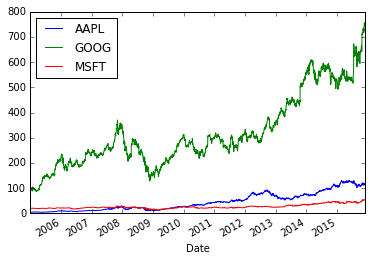

In [25]:
f['Adj Close'].plot()

In [34]:
adj_close = f['Adj Close']

In [38]:
adj_close.index = pd.MultiIndex.from_arrays([adj_close.index.year,
                                             adj_close.index.quarter,
                                             adj_close.index.month,
                                             adj_close.index.day], names=['Year','Quarter','Month','Day'])

In [40]:
adj_close.head()

AAPL        GOOG       MSFT
Year Quarter Month Day                                 
2005 1       1     3    4.186585  101.253921  20.887241
                   4    4.229582   97.153010  20.965354
                   5    4.266626   96.658507  20.918487
                   6    4.269933   94.180978  20.895053
                   7    4.580835   96.828337  20.832563

In [41]:
vol = f['Volume']
vol.index = pd.MultiIndex.from_arrays([vol.index.year,
                                       vol.index.quarter,
                                       vol.index.month,
                                       vol.index.day], names=['Year','Quarter','Month','Day'])

In [42]:
vol.head()

AAPL      GOOG       MSFT
Year Quarter Month Day                                
2005 1       1     3    172998000  31807000   65002900
                   4    274202600  27614900  109442100
                   5    170108400  16534800   72463500
                   6    176388800  20851900   76890500
                   7    556862600  19398200   68723300

In [45]:
vol.groupby(level=['Year','Month']).sum().head()

AAPL       GOOG        MSFT
Year Month                                   
2005 1      6427061200  411865800  1521414300
     2      5362236600  653658400  1361126000
     3      3668980000  345184900  1541411300
     4      4843879600  455080000  1520253700
     5      3214573600  509437700  1270563700

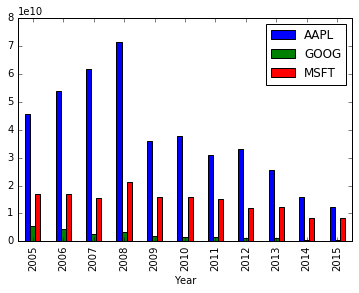

In [58]:
vol.groupby(level='Year').sum().plot(kind='bar')

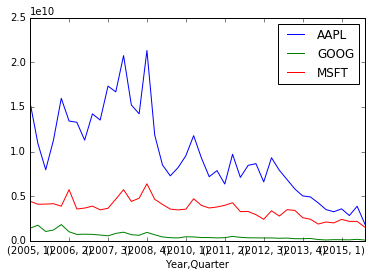

In [60]:
vol.groupby(level=['Year','Quarter']).sum().plot()

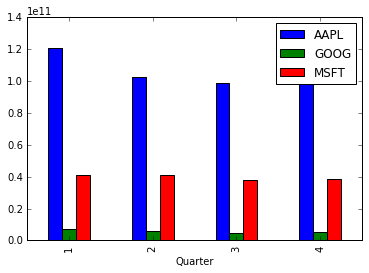

In [57]:
vol.groupby(level='Quarter').sum().plot(kind='bar')

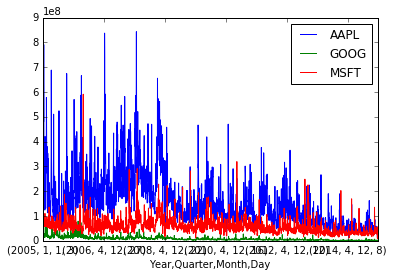

In [49]:
vol.plot()